In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('tianchi_mobile_recommend_train_user.csv')

# 1. Data Introduction

In [ ]:
# Data introduction
data.shape

(10775188, 6)

In [ ]:
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


# 3. Data Cleaning

**3.1. Deal with none/absent values**

In [ ]:
data.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     7329014
item_category          0
time                   0
dtype: int64

In [ ]:
data = data.drop('user_geohash', axis=1)

In [ ]:
print('The whole size of data(page view):',len(data))
print('The number of user：',len(set(data['user_id'])))
print('The item number：',len(set(data['item_id'])))
print('The catagory of items：',len(set(data['item_category'])))
print('The number of click: ',len(data[data['behavior_type']==1]))
print('The number of favorite: ',len(data[data['behavior_type']==2]))
print('The number of add to cart: ',len(data[data['behavior_type']==3]))
print('The number of purchase: ',len(data[data['behavior_type']==4]))

The whole size of data(page view): 10775187
The number of user： 9998
The item number： 2774836
The catagory of items： 8869
The number of click:  10154640
The number of favorite:  213049
The number of add to cart:  301564
The number of purchase:  105934


**3.2. Feature engneering**

Extract 'date' and 'hour' from 'time

In [ ]:
data[['date', 'hour']] = data['time'].str.split(' ', expand=True)
data.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21


**3.3. Data convertion**

In [ ]:
data.dtypes

user_id           int64
item_id           int64
behavior_type     int64
item_category     int64
time             object
date             object
hour             object
dtype: object

In [ ]:
invalid_time_entries = data[data['time'].str.len() != 13]

# Display any such entries to understand the issue
invalid_time_entries

,user_id,item_id,behavior_type,item_category,time,date,hour
10775187,92243806,160781516,1,2254,201,201,None


In [ ]:
data.drop(invalid_time_entries.index, inplace=True)

In [ ]:
data['time'] = pd.to_datetime(data['time'])
data['date'] = pd.to_datetime(data['date'])
unique_hours = data['hour'].unique()
data['hour'] = data['hour'].astype('Int64')

data.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      Int64
dtype: object

**3.4. Outlier**


In [ ]:
data=data.sort_values(by='time',ascending=True)
data=data.reset_index(drop=True)
data.describe()

,user_id,item_id,behavior_type,item_category,hour
count,1.077519e+07,1.077519e+07,1.077519e+07,1.077519e+07,10775187.0
mean,7.176514e+07,2.023167e+08,1.105240e+00,6.846173e+03,14.819639
std,4.122575e+07,1.167377e+08,4.573029e-01,3.809696e+03,6.474038
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.0
25%,3.594817e+07,1.014130e+08,1.000000e+00,3.721000e+03,10.0
50%,7.302413e+07,2.021502e+08,1.000000e+00,6.209000e+03,16.0
75%,1.074166e+08,3.035509e+08,1.000000e+00,1.029000e+04,20.0
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,23.0


**3.5 Deal with abnormal data**

1. Plot the page view distribution of users

2. Plot the Favorites distribution of users

3. Plot the Adding to shopbag behavior distribution of users

4. Plot the purchasing behavior distribution of users

In [ ]:
# Group by user_id and behavior_type, then count each type of action
user_behavior_counts = data.groupby(['user_id', 'behavior_type']).size().unstack(fill_value=0).reset_index()

# Rename the columns for readability
user_behavior_counts.columns = ['user_id', 'click', 'favorite', 'add_to_cart', 'buy']

# Display the DataFrame

<ipython-input-182-e32b4d4afb38>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_behavior_counts['click'], kde=False, bins=30)
<ipython-input-182-e32b4d4afb38>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_behavior_counts['favorite'], kde=False, bins=30)
<ipython-input-182-e32b4d4

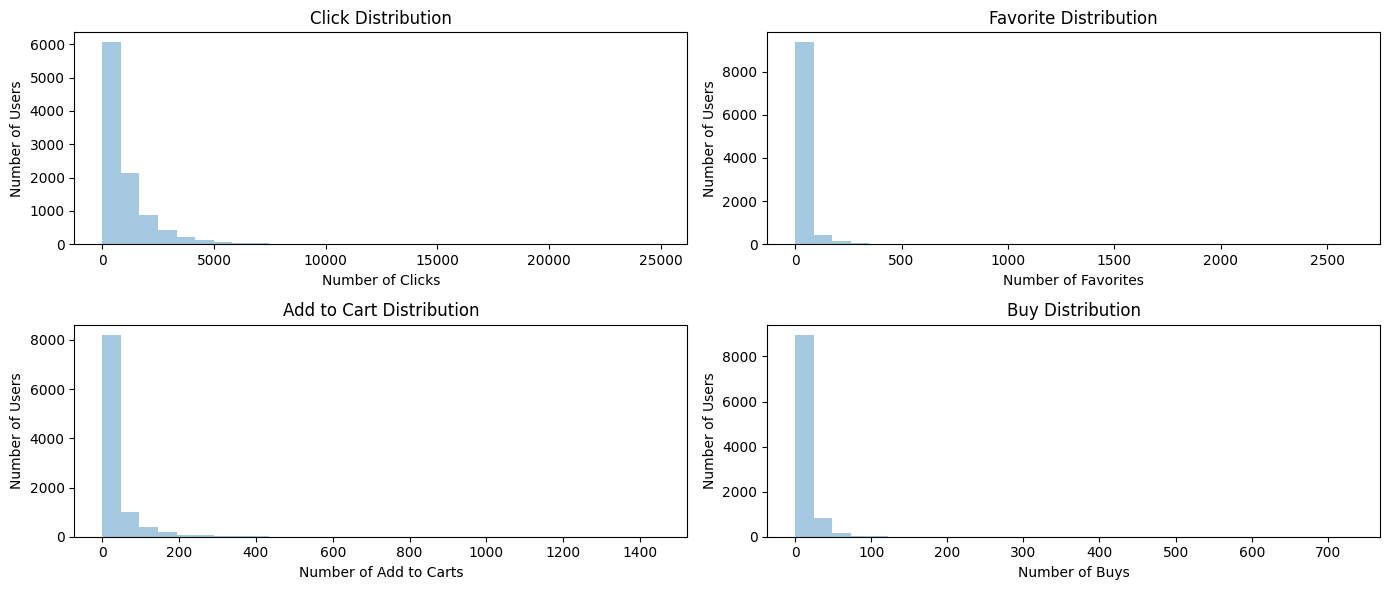

In [ ]:
# Plotting the distributions
plt.figure(figsize=(14, 6))

# Click Distribution
plt.subplot(2, 2, 1)
sns.distplot(user_behavior_counts['click'], kde=False, bins=30)
plt.title('Click Distribution')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Users')

# Favorite Distribution
plt.subplot(2, 2, 2)
sns.distplot(user_behavior_counts['favorite'], kde=False, bins=30)
plt.title('Favorite Distribution')
plt.xlabel('Number of Favorites')
plt.ylabel('Number of Users')

# Add to Cart Distribution
plt.subplot(2, 2, 3)
sns.distplot(user_behavior_counts['add_to_cart'], kde=False, bins=30)
plt.title('Add to Cart Distribution')
plt.xlabel('Number of Add to Carts')
plt.ylabel('Number of Users')

# Buy Distribution
plt.subplot(2, 2, 4)
sns.distplot(user_behavior_counts['buy'], kde=False, bins=30)
plt.title('Buy Distribution')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()


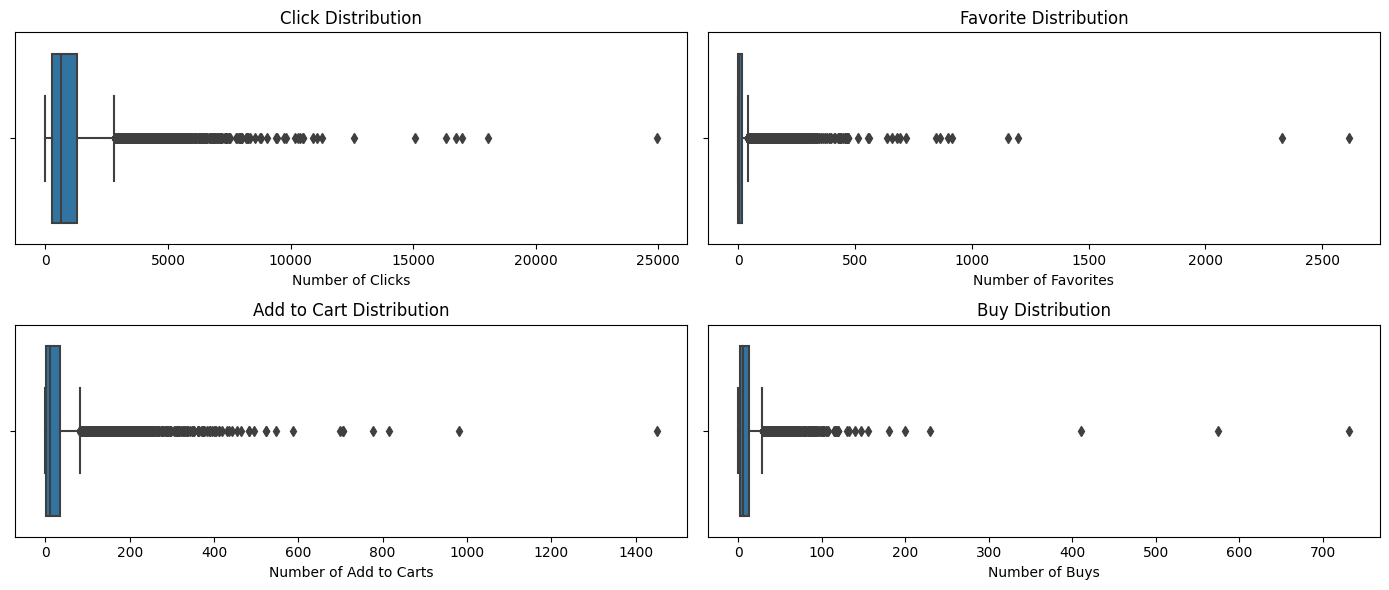

In [ ]:
# Plotting the box plots
plt.figure(figsize=(14, 6))

# Box plot for Click Distribution
plt.subplot(2, 2, 1)
sns.boxplot(x=user_behavior_counts['click'])
plt.title('Click Distribution')
plt.xlabel('Number of Clicks')

# Box plot for Favorite Distribution
plt.subplot(2, 2, 2)
sns.boxplot(x=user_behavior_counts['favorite'])
plt.title('Favorite Distribution')
plt.xlabel('Number of Favorites')

# Box plot for Add to Cart Distribution
plt.subplot(2, 2, 3)
sns.boxplot(x=user_behavior_counts['add_to_cart'])
plt.title('Add to Cart Distribution')
plt.xlabel('Number of Add to Carts')

# Box plot for Buy Distribution
plt.subplot(2, 2, 4)
sns.boxplot(x=user_behavior_counts['buy'])
plt.title('Buy Distribution')
plt.xlabel('Number of Buys')

plt.tight_layout()
plt.show()



In e-commerce platforms, unusually high frequencies of user behavior can typically be attributed to the following scenarios:

**1. Automated Scripts or Bots:**
- These are often scripts programmed to emulate real user behaviors, potentially serving various purposes, such as data scraping by search engines, merchants conducting automated testing on their product pages, or for price monitoring.
- In some instances, bots might also be used for unfair competition, like automating clicks on a competitor's ads to deplete their advertising budget.

**2. Brushing:**
- Brushing is a deceptive practice where merchants inflate transaction volumes to boost product rankings and reputations, typically involving fake purchases, clicks, and reviews. In order to improve the ranking and visibility of products or stores, some malicious merchants adopt false cheating behaviors to increase sales, mainly including false promotion behaviors (collection, purchase and purchase) and false reviews

**3. Power Users or Highly Active Users:**
- Such users may display highly active shopping behaviors on the platform due to professional needs (like professional buyers) or personal interests (like collectors).

**4. Competitor Actions:**
- Competitors might engage in various activities to gather market intelligence or disrupt other merchants' operations, for example, by repeatedly clicking to inspect or affect the search ranking of a competitor's products.

**5. Big promotion:**
December 12 is a big promation day in China.

The following analytical approaches to further **explore potential anomalous behaviors:**

**1.Frequency Analysis**: Analyze the behavior frequency of specific users to determine if the patterns align with normal human user interactions.

**2.Time Series Analysis**: Examine if behaviors are concentrated within specific time periods, which might indicate the operation of automated scripts.

**3. Source Analysis**: If possible, check the source of user behaviors (like IP addresses, device information, etc.) to determine if a large volume of actions originates from specific sources, which could be a sign of automation or coordinated efforts.

**4. Interaction Depth Analysis**: Analyze whether users engage in further interactions after clicking, such as adding to cart or favoriting, followed by purchases, which can help identify normal user shopping paths versus anomalous ones.

**Remove abnormal data**

In [ ]:
behavior_counts = data.groupby(['user_id', 'behavior_type']).size().reset_index(name='counts')

users_to_exclude = set()
for b_type in data['behavior_type'].unique():
    behavior_data = behavior_counts[behavior_counts['behavior_type'] == b_type]
    Q3 = behavior_data['counts'].quantile(0.75)
    IQR = Q3 - behavior_data['counts'].quantile(0.25)
    upper_bound = Q3 + 2 * IQR
    users_to_exclude.update(behavior_data[behavior_data['counts'] > upper_bound]['user_id'].unique())

#remove the anomal users
filtered_data = data[~data['user_id'].isin(users_to_exclude)]

print(f'Original number of users: {data["user_id"].nunique()}')
print(f'Number of users after filtering: {filtered_data["user_id"].nunique()}')


Original number of users: 9998
Number of users after filtering: 8647


In [ ]:
# Now 'data' has had the upper outliers removed.
print('The whole size of data(page view):',len(filtered_data))
print('The number of user：',len(set(filtered_data['user_id'])))
print('The item number：',len(set(filtered_data['item_id'])))
print('The catagory of items：',len(set(filtered_data['item_category'])))
print('The number of click: ',len(filtered_data[filtered_data['behavior_type']==1]))
print('The number of favorite: ',len(filtered_data[filtered_data['behavior_type']==2]))
print('The number of add to cart: ',len(filtered_data[filtered_data['behavior_type']==3]))
print('The number of purchase: ',len(filtered_data[filtered_data['behavior_type']==4]))

The whole size of data(page view): 6304991
The number of user： 8647
The item number： 1705341
The catagory of items： 8346
The number of click:  6005246
The number of favorite:  82130
The number of add to cart:  153006
The number of purchase:  64609


In [ ]:
# Group by user_id and behavior_type, then count each type of action
user_behavior_counts = filtered_data.groupby(['user_id', 'behavior_type']).size().unstack(fill_value=0).reset_index()

# Rename the columns for readability
user_behavior_counts.columns = ['user_id', 'click', 'favorite', 'add_to_cart', 'buy']

<ipython-input-187-e32b4d4afb38>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_behavior_counts['click'], kde=False, bins=30)
<ipython-input-187-e32b4d4afb38>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_behavior_counts['favorite'], kde=False, bins=30)
<ipython-input-187-e32b4d4

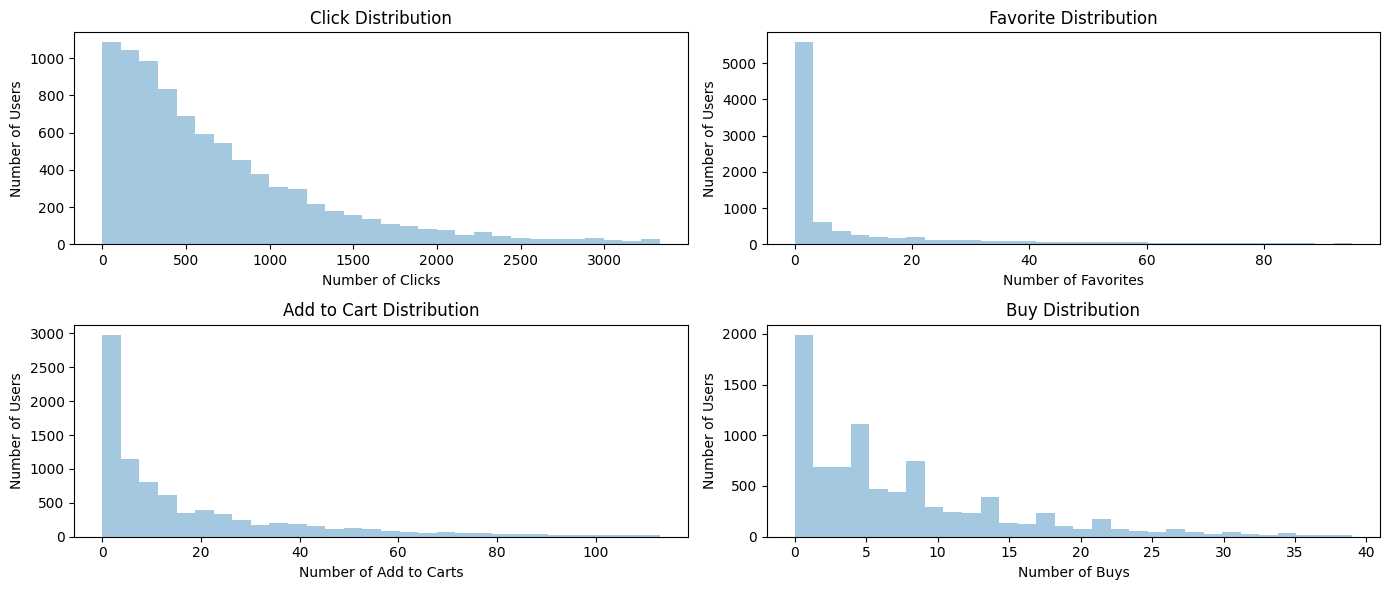

In [ ]:
# Plotting the distributions
plt.figure(figsize=(14, 6))

# Click Distribution
plt.subplot(2, 2, 1)
sns.distplot(user_behavior_counts['click'], kde=False, bins=30)
plt.title('Click Distribution')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Users')

# Favorite Distribution
plt.subplot(2, 2, 2)
sns.distplot(user_behavior_counts['favorite'], kde=False, bins=30)
plt.title('Favorite Distribution')
plt.xlabel('Number of Favorites')
plt.ylabel('Number of Users')

# Add to Cart Distribution
plt.subplot(2, 2, 3)
sns.distplot(user_behavior_counts['add_to_cart'], kde=False, bins=30)
plt.title('Add to Cart Distribution')
plt.xlabel('Number of Add to Carts')
plt.ylabel('Number of Users')

# Buy Distribution
plt.subplot(2, 2, 4)
sns.distplot(user_behavior_counts['buy'], kde=False, bins=30)
plt.title('Buy Distribution')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()


In [ ]:
filtered_data.rename(columns={'filtered_date': 'date'}, inplace=True)


<ipython-input-188-547c17960602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={'filtered_date': 'date'}, inplace=True)


 5. Plot the page view to purchase conversion rate for each user

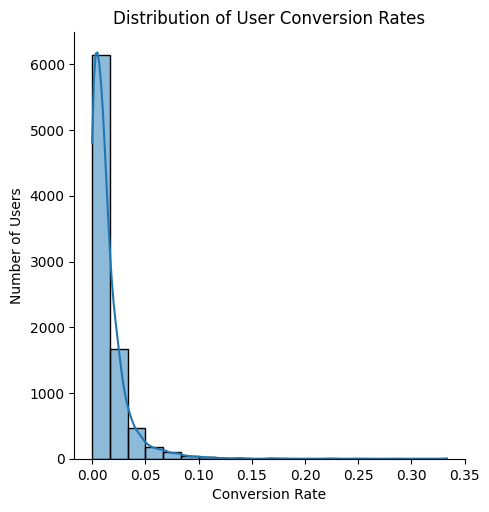

In [ ]:
# Calculate the total number of page views for each user
user_page_views = filtered_data.groupby('user_id').size()

# Calculate the total number of purchases for each user
user_purchases = filtered_data[filtered_data['behavior_type'] == 4].groupby('user_id').size()

# Calculate the conversion rate for each user
# We will reindex user_purchases to make sure every user_id from user_page_views is present.
user_conversion_rate = user_purchases.reindex(user_page_views.index, fill_value=0) / user_page_views

# Create a DataFrame for the results
user_conversion_rate_df = pd.DataFrame({'conversion_rate': user_conversion_rate})

# Reset index to turn the index into a column
user_conversion_rate_df.reset_index(inplace=True)
# Assuming 'user_conversion_rate_df' is a DataFrame with a 'conversion_rate' column
sns.displot(user_conversion_rate_df['conversion_rate'], kde=True, bins=20)
plt.title('Distribution of User Conversion Rates')
plt.xlabel('Conversion Rate')
plt.ylabel('Number of Users')
plt.show()



6. User total page view's distribution in this period

Text(-3.8055555555555554, 0.5, 'Number of Users')

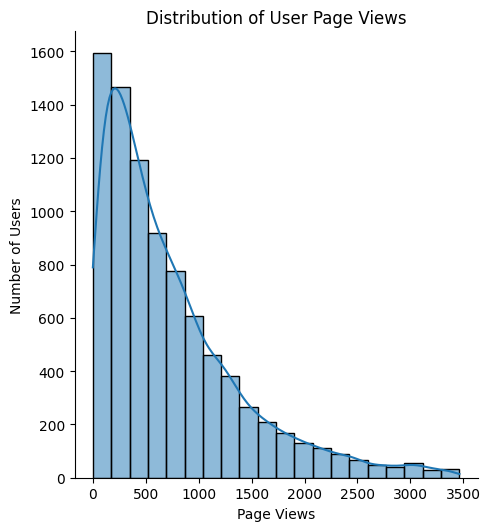

In [ ]:
user_page_views = filtered_data.groupby('user_id').size()
sns.displot(user_page_views, kde=True, bins=20)
plt.title('Distribution of User Page Views')
plt.xlabel('Page Views')
plt.ylabel('Number of Users')

In [ ]:
#taobaodata = data.sample(random_state=1)
#taobaodata.to_csv('taobao.csv', index=False)
#from google.colab import files
#files.download('taobao.csv')

# 4. User behavior analysis

**4.1. pv and uv analysis**

PV(visits) : Page View, which refers to the number of page views or clicks of the website, and the page is refreshed once.

UV(Unique Visitor) : A Unique Visitor, a computer client that visits your website as a visitor

**4.1.1. Daily PV and UV analysis**

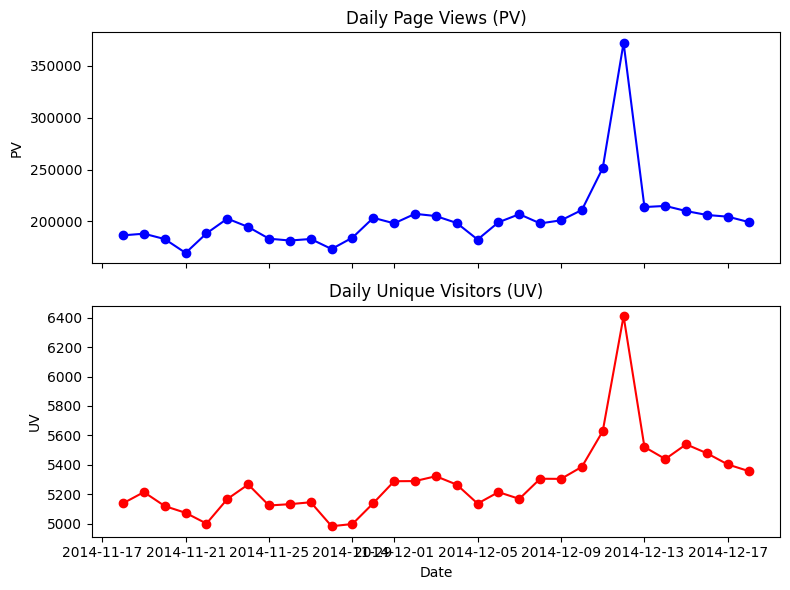

In [ ]:
pv_daily = filtered_data.groupby('date').size().reset_index(name='pv')
uv_daily = filtered_data.groupby('date')['user_id'].nunique().reset_index(name='uv')

fig, axes = plt.subplots(2, 1, figsize=(8,6), sharex=True)

# PV
axes[0].plot(pv_daily['date'], pv_daily['pv'], marker='o', color='b')
axes[0].set_title('Daily Page Views (PV)')
axes[0].set_ylabel('PV')

# UV
axes[1].plot(uv_daily['date'], uv_daily['uv'], marker='o', color='r')
axes[1].set_title('Daily Unique Visitors (UV)')
axes[1].set_ylabel('UV')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

**Insights:**

*   **Peak in PV and UV**: This suggests that the promotions on Singles' Day successfully attracted a large number of users to browse and visit.
*  **Gap between PV and UV**: A much larger number of PVs compared to UVs on Dec 12th might mean that each visitor viewed more pages on that day. This could be because users were looking for the best deals and discounts, or because there was a wide variety of products offered on Singles' Day that required more time to browse through.

*  **Daily User Activity Rate**: The total number of users in the dataset is around 10,000 and the UV is close to 7,000, it indicates that about 70% of the users were active on the platform during Singles' Day.






**4.1.2 Hourly PV and UV analysis**

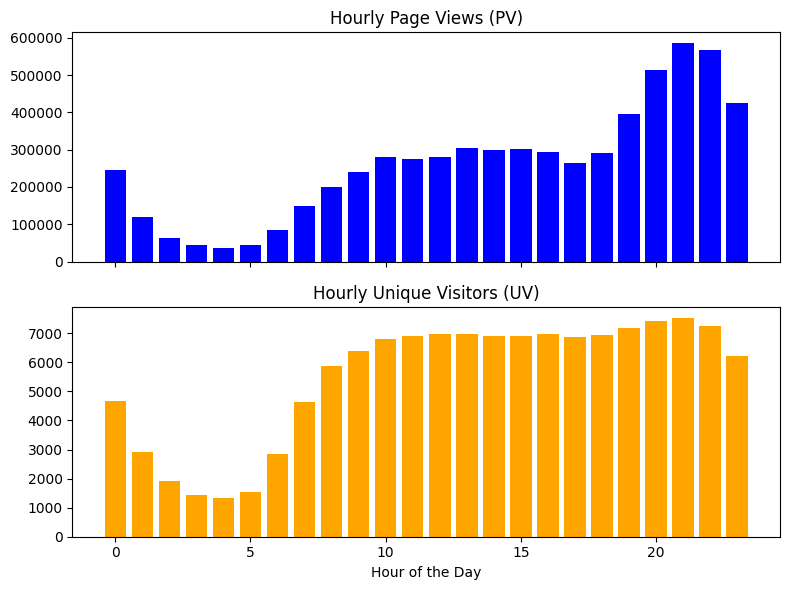

In [ ]:
pv_hour = filtered_data.groupby('hour').size().reset_index(name='pv')

uv_hour = filtered_data.groupby('hour')['user_id'].nunique().reset_index(name='uv')

fig, (ax_pv, ax_uv) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

#pv
ax_pv.bar(pv_hour['hour'], pv_hour['pv'], color='blue')
ax_pv.set_title('Hourly Page Views (PV)')

# UV
ax_uv.bar(uv_hour['hour'], uv_hour['uv'], color='orange')
ax_uv.set_title('Hourly Unique Visitors (UV)')

ax_uv.set_xlabel('Hour of the Day')

plt.tight_layout()
plt.show()

**Insights:**

*   **Low Nighttime Activity**: Between midnight and 5 AM, both PV and UV are lower, indicating reduced user activity, likely because most people are asleep during these hours.

*  **Evening Peak Activity**: Around 18:00, the sharp fluctuations in PV suggest that users are actively browsing multiple pages during this time. This could be due to users starting their online shopping or browsing sessions after work or study hours.

*  **Difference Between PV and UV**: The sharp fluctuations in PV compared to the relative stability of UV indicate that while the number of unique users visiting the site may not change significantly, their page views vary greatly. This may mean users are engaging more deeply with the site's content or comparing different products at this time.
*   **Marketing and Promotion**: The active user period after 18:00 is particularly important for scheduling marketing and promotional activities, as ads or notifications could be released to engage users during these peak times.
*   **Optimizing User Experience**: During peak user activity times, websites should ensure optimized performance, with quick page loads and high-quality user experiences to maintain user engagement.







**4.1.3. Hourly PV analysis among different type of user behavoir**


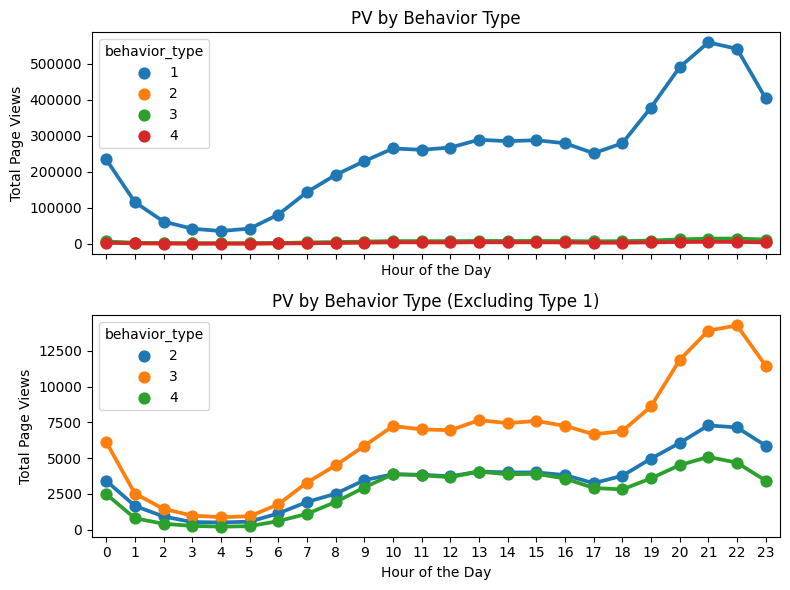

In [ ]:
pv_total = filtered_data.groupby(['behavior_type', 'hour'])['user_id'].count().reset_index(name='total_pv')

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
sns.pointplot(x='hour', y='total_pv', hue='behavior_type', data=pv_total, ax=axes[0])
axes[0].set_title('PV by Behavior Type')

sns.pointplot(x='hour', y='total_pv', hue='behavior_type', data=pv_total[pv_total['behavior_type'] != 1], ax=axes[1])
axes[1].set_title('PV by Behavior Type (Excluding Type 1)')

for ax in axes:
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Total Page Views')

plt.tight_layout()
plt.show()


**Insights:**


*   **Clicking** (behavior type 1) is by far the most common action, dwarfing the other types in terms of PV
*  Excluding clicking, **adding to cart (behavior type 3) shows the highest activity** compared to favoriting (behavior type 2) and purchasing (behavior type 4). This could imply that users are more likely to add items to the cart than to engage in other types of behaviors.



# 5. The consumpation behavior of user analysis

**5.1. The analysis of average times in this period of comsumpation per user including who has not comsumpts**








In [ ]:
consumption_data = filtered_data[filtered_data['behavior_type'] == 4]

# Calculate the sum of consumption times per user
consumption_sum = consumption_data.groupby('user_id').size().sum()

# Count the total number of distinct users in the dataset
total_users = filtered_data['user_id'].nunique()

# Calculate the average number of consumption times per user
avg_consumption_times = consumption_sum / total_users

print(avg_consumption_times)

7.471839944489418


**5.2 The times distribution of consumpation of users in this period**

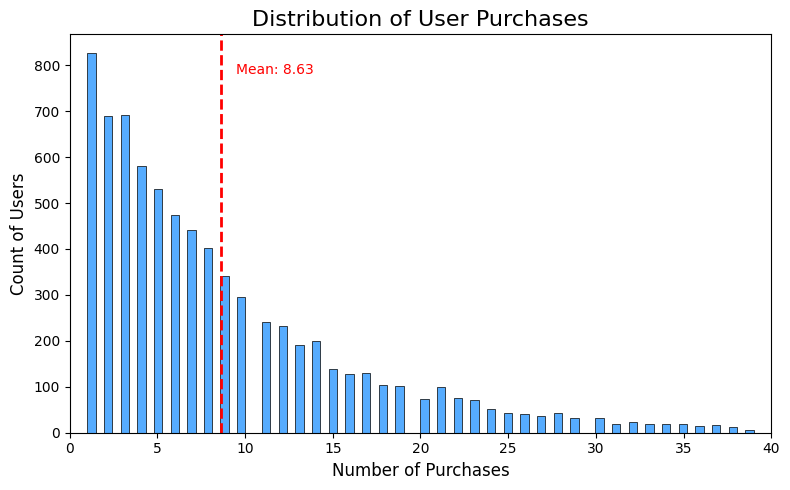

In [ ]:
data_purchase=filtered_data[filtered_data.behavior_type==4].groupby('user_id')['behavior_type'].count()


plt.figure(figsize=(8, 5))

sns.histplot(data_purchase, bins=80, color="dodgerblue", edgecolor='black')

plt.title('Distribution of User Purchases', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)

plt.xlim(0, 40)

mean_val = data_purchase.mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_val*1.1, max_ylim*0.9, f'Mean: {mean_val:.2f}', color = 'red')

plt.tight_layout()

plt.show()

**5.3 Rebuy rate, namely purchasing more than 2 times divide by all purchasing number**

In [ ]:
purchases = filtered_data[filtered_data.behavior_type == 4]

# Count unique purchase dates for each user
rebuy_counts = purchases.groupby('user_id')['date'].nunique()

# Calculate rebuy rate
rebuy_rate = (rebuy_counts >= 2).mean()
rebuy_rate

0.838188134687333

**5.4. daily_pay_rate，daily consumpation number divided by daily unique visitors number**

        date  daily_pay_rate
0 2014-11-18        0.405605
1 2014-11-19        0.386460
2 2014-11-20        0.371362
3 2014-11-21        0.329982
4 2014-11-22        0.386800


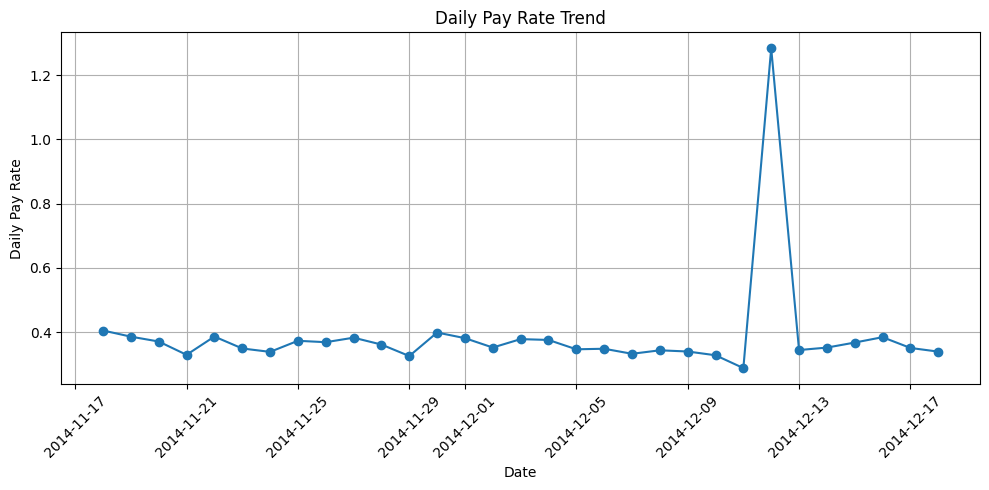

In [ ]:
# Calculate daily consumption number
daily_consumption = filtered_data[filtered_data['behavior_type'] == 4].groupby('date').size()

# Calculate daily unique visitors
daily_visitors = filtered_data.groupby('date')['user_id'].nunique()

# Calculate daily pay rate
daily_pay_rate = daily_consumption / daily_visitors

# Create a DataFrame for the results
daily_pay_rate_df = pd.DataFrame({'date': daily_pay_rate.index, 'daily_pay_rate': daily_pay_rate.values})

# Sort the DataFrame by date
daily_pay_rate_df.sort_values(by='date', inplace=True)

# Display the first few rows of the DataFrame
print(daily_pay_rate_df.head())
plt.figure(figsize=(10, 5))
plt.plot(daily_pay_rate_df['date'], daily_pay_rate_df['daily_pay_rate'], marker='o', linestyle='-')
plt.title('Daily Pay Rate Trend')
plt.xlabel('Date')
plt.ylabel('Daily Pay Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights:**
Promotion Impact: The spike on December 12th clearly demonstrates the substantial impact of promotional events on consumer purchasing behavior. It shows that users are highly responsive to sales and special offers, leading to a surge in the pay rate.

Baseline Consumer Behavior: Prior to and after the promotion day, the pay rate remains relatively stable with minor fluctuations. This suggests a consistent baseline of consumer purchasing behavior without the influence of major sales events.

Preparation for Demand: The spike on December 12th would require careful planning from the Taobao platform in terms of server capacity, customer service, and logistics to handle the increased volume of transactions.

# 6.Churn Funnel

In [ ]:
pv_all=len(filtered_data)
print(pv_all)

6304991


In [ ]:
data_user_count=filtered_data.groupby(['behavior_type']).count()
data_user_count.head()

,user_id,item_id,item_category,time,date,hour
behavior_type,,,,,,
1,6005246,6005246,6005246,6005246,6005246,6005246
2,82130,82130,82130,82130,82130,82130
3,153006,153006,153006,153006,153006,153006
4,64609,64609,64609,64609,64609,64609


**6.1 PV to click lost rate**

In [ ]:
pv_click_lostrate = round((pv_all - len(filtered_data[filtered_data.behavior_type == 1])) * 100 / pv_all, 2)
print(f"{pv_click_lostrate}%")

4.75%


**6.2 Click to shopcart lost rate**

In [ ]:
click_bag_lostrate = round((len(filtered_data[filtered_data.behavior_type == 1]) - len(filtered_data[filtered_data.behavior_type == 3])) *100/ len(filtered_data[filtered_data.behavior_type == 1]),2)

print(f"{click_bag_lostrate}%")

97.45%


**6.3 Click to Favorite lost rate**

In [ ]:
click_fav_lostrate = round((len(filtered_data[filtered_data.behavior_type == 1]) - len(filtered_data[filtered_data.behavior_type == 2])) *100/ len(filtered_data[filtered_data.behavior_type == 1]),2)
print(f"{click_fav_lostrate}%")

98.63%


**6.4. Shopbag to buy lost rate**

In [ ]:
fav_buy_lostrate = round((len(filtered_data[filtered_data.behavior_type == 2]) - len(filtered_data[filtered_data.behavior_type == 4])) *100/ len(filtered_data[filtered_data.behavior_type == 2]),2)
print(f"{fav_buy_lostrate}%")


21.33%


**Insights**:
Engagement: Users are initially very engaged, as seen by the low PV to click lost rate.

Conversion Challenges: There is a significant drop-off from clicking to adding items to the cart or marking them as favorites, suggesting that while users are interested in browsing, they may require additional motivation or incentives to move forward in the purchasing process.

Checkout Optimization: The relatively lower cart to purchase lost rate implies that once users have a strong intent to buy (evidenced by adding an item to the cart), they are more likely to complete the purchase. Addressing the reasons for the remaining lost rate could involve simplifying the checkout process, offering discounts, or retargeting users with abandoned carts through reminders or promotions.

# 7. Conversion rate

**7.1 Calculating the conversion rate(purchasing) after click, favorite, shopcart**

In [ ]:
click_to_buy = len(filtered_data[(filtered_data['behavior_type'] == 1) & (filtered_data['item_id'].isin(filtered_data[filtered_data['behavior_type'] == 4]['item_id']))])
favorite_to_buy = len(filtered_data[(filtered_data['behavior_type'] == 2) & (filtered_data['item_id'].isin(filtered_data[filtered_data['behavior_type'] == 4]['item_id']))])
cart_to_buy = len(filtered_data[(filtered_data['behavior_type'] == 3) & (filtered_data['item_id'].isin(filtered_data[filtered_data['behavior_type'] == 4]['item_id']))])

total_clicks = len(filtered_data[filtered_data['behavior_type'] == 1])
total_favorites = len(filtered_data[filtered_data['behavior_type'] == 2])
total_cart_additions = len(filtered_data[filtered_data['behavior_type'] == 3])

click_conversion_rate = click_to_buy / total_clicks
favorite_conversion_rate = favorite_to_buy / total_favorites
cart_conversion_rate = cart_to_buy / total_cart_additions

print('Click Conversion Rate:', click_conversion_rate)
print('Favorites Conversion Rate:', favorite_conversion_rate)
print('Shopbag Conversion Rate:', cart_conversion_rate)

Click Conversion Rate: 0.13800850123375463
Favorites Conversion Rate: 0.1359064897114331
Shopbag Conversion Rate: 0.2931061526998941


**Insight:**

Engagement to Sales Funnel: These rates are critical for understanding the sales funnel and identifying which stages of the customer journey are most effective at converting interest into sales.

Marketing Strategies: The data can inform marketing strategies, such as remarketing campaigns targeted at users who have clicked on or favorited items but have not yet made a purchase.


**7.2. The conversion rate of different item category after click, favorite shopcart.**

In [ ]:
data_category = filtered_data.groupby(['item_category', 'behavior_type']).size().unstack().rename(columns={1: 'click', 2:'fav',3: 'cart', 4: 'buy'}).fillna(0)
data_category.head()

behavior_type,click,fav,cart,buy
item_category,,,,
2,3.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0
8,814.0,4.0,3.0,3.0
10,165.0,2.0,4.0,1.0


In [ ]:
data_category['ClickConvertionRate']=data_category['buy']/data_category['click']
data_category['FavConvertionRate']=data_category['buy']/data_category['fav']
data_category['ShopcartkConvertionRate']=data_category['buy']/data_category['cart']
data_category.head()

behavior_type,click,fav,cart,buy,ClickConvertionRate,FavConvertionRate,ShopcartkConvertionRate
item_category,,,,,,,
2,3.0,0.0,0.0,0.0,0.000000,NaN,NaN
3,3.0,0.0,0.0,0.0,0.000000,NaN,NaN
6,2.0,0.0,0.0,0.0,0.000000,NaN,NaN
8,814.0,4.0,3.0,3.0,0.003686,0.75,1.00
10,165.0,2.0,4.0,1.0,0.006061,0.50,0.25


From this data, the e-commerce platform could derive strategies to improve conversion rates across various categories and address the issues in categories with low or no conversions. Additionally, understanding the customer journey from these behaviors to purchase could help in optimizing the sales funnel.

# 8.RFM (Recency, Frequency, Monetary) Model and K-means Cluster

The RFM model, a customer segmentation technique that uses past purchase behavior to divide customers into groups.

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait.

Recency measures how recently a customer made a purchase.
Frequency measures how often they make purchases
and Monetary value measures how much they spend.
Although the Monetary component is often included, this implementation focuses on Recency and Frequency to perform K-means clustering.

K-means is used to identify clusters of customers with similar RFM characteristics, allowing for targeted marketing strategies and personalized customer engagement.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


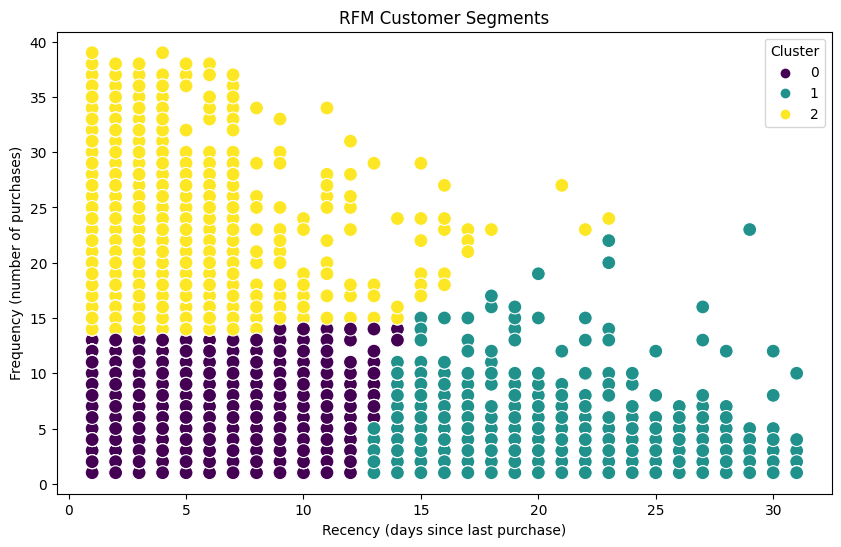

In [ ]:
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

datenow = datetime(2014,12,19)
recent_purchase_time = filtered_data[filtered_data['behavior_type'] == 4].groupby('user_id')['date'].max().reset_index()
recent_purchase_time['recent'] = (datenow - recent_purchase_time['date']).dt.days
buy_freq = filtered_data[filtered_data['behavior_type'] == 4].groupby('user_id').size().reset_index(name='freq')
rfm = pd.merge(recent_purchase_time[['user_id', 'recent']], buy_freq, on='user_id', how='outer')

# Normalize features
X = rfm[['recent', 'freq']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
rfm['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='recent', y='freq', hue='cluster', palette='viridis', s=100)
plt.title('RFM Customer Segments')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(title='Cluster')
plt.show()


From the scatter plot with three clusters, here are the insights you can derive:

**Cluster 0 (Purple): High-Value Customers**

These customers have purchased recently and do so frequently. They are likely the most engaged and loyal customer base.

Insight: This group should be the focus of retention strategies. Consider loyalty programs, upselling, or cross-selling opportunities, and personalized communication to maintain their high engagement level.

**Cluster 1 (Yellow): At-Risk Customers**

Customers in this group have not made purchases recently but have a high frequency of past purchases. They were once very active but now may be losing interest or turning to competitors.

Insight: These customers may require re-engagement strategies. Consider sending them reactivation offers, feedback surveys to understand their inactivity, or personalized promotions to encourage a return.

**Cluster 2 (Teal): Low-Engagement or New Customers**

These customers either are new and have not yet established a pattern of frequent purchases, or they purchase infrequently. This group shows a wide range in recency, indicating some may be slipping away while others might be more recent.

Insight: For recent customers with low frequency, welcome campaigns and introductory offers can be effective. For others, consider creating awareness about your products or services and offer incentives to increase their purchase frequency.